# M505D - Intro to AI And Machine Learning

# Student: Ajay Yadav
# Student Number: GH1040814

# Mobile Price Classification using Logistic Regression and SVM-like Models

# Summary

### This Project investigates if a mobile device's specifications—such as its RAM, battery, processor, display, camera, and so on—can be utilized to determine whether it is expensive or not. We applied two machine learning models—Logistic Regression and an SVM-like classifier (hinge loss)—that were created from scratch using Keras (without sklearn) on a dataset of mobile requirements. F1-score, recall, accuracy, and precision were used to assess the models.

# Description

### According to the analysis, the SVM-like model performed better in terms of accuracy and recall than logistic regression. This implies that price categorization may be impacted by non-linear correlations in mobile parameters, which would make SVM-like models more appropriate for these kinds of jobs.

# Data set and Github link

# Data set 
https://www.kaggle.com/datasets/ankit07chy/mobile-uncleaned-data-set-scrapped-real-website 
# Github
https://github.com/vishuajju4-cpu/M505D-AI-and-Machine-Learning

In [84]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [85]:
# Load Dataset
df = pd.read_csv("C:\\AI_Application\\mobile.csv")  
df

,Name,Spec Score,rating,price,img,tag,sim,processor,storage,battery,display,camera,memoryExternal,version,fm
0,OPPO Reno 14 Pro 5G,89,4.65,41990,https://cdn1.smartprix.com/rx-is822PXo3-w280-h...,UPCOMING,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8450, Octa Core, 3.25 GHz Processor","12 GB RAM, 256 GB inbuilt",6200 mAh Battery with 80W Fast Charging,"6.83 inches, 1272 x 2800 px, 120 Hz Display wi...",50 MP + 50 MP + 50 MP Triple Rear & 50 MP Fron...,NaN,Android v15,No FM Radio
1,OPPO Reno 14 5G,87,4.75,32990,https://cdn1.smartprix.com/rx-iRGgfcGDH-w280-h...,UPCOMING,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 8350, Octa Core, 3.35 GHz Processor","8 GB RAM, 256 GB inbuilt",6000 mAh Battery with 80W Fast Charging,"6.59 inches, 1256 x 2760 px, 120 Hz Display wi...",50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...,NaN,Android v15,No FM Radio
2,Poco F7 5G,83,4.75,31999,https://cdn1.smartprix.com/rx-icmgBU9Q2-w280-h...,LAUNCHED,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8s Gen4, Octa Core, 3.2 GHz Processor","12 GB RAM, 256 GB inbuilt",7550 mAh Battery with 90W Fast Charging,"6.83 inches, 1280 x 2772 px, 120 Hz Display wi...",50 MP + 8 MP Dual Rear & 20 MP Front Camera,Memory Card Not Supported,Android v15,NaN
3,Vivo X200 FE,89,4.65,49990,https://cdn1.smartprix.com/rx-iHI7IaQgQ-w280-h...,UPCOMING,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Dimensity 9300 Plus, Octa Core, 3.25 GHz Proce...","12 GB RAM, 256 GB inbuilt",6500 mAh Battery with 90W Fast Charging,"6.31 inches, 1216 x 2640 px, 120 Hz Display wi...",50 MP + 50 MP + 8 MP Triple Rear & 50 MP Front...,Memory Card Not Supported,Android v15,NaN
4,OPPO K13x 5G,73,4.20,11999,https://cdn1.smartprix.com/rx-iXUulomIY-w280-h...,LAUNCHED,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi","Dimensity 6300, Octa Core, 2.4 GHz Processor","4 GB RAM, 128 GB inbuilt",6000 mAh Battery with 45W Fast Charging,"6.67 inches, 720 x 1604 px, 120 Hz Display wit...",50 MP + 2 MP Dual Rear & 8 MP Front Camera,"Memory Card Supported, upto 2 TB",Android v15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014,Realme GT 7 Pro Racing Edition,85,4.05,36999,https://cdn1.smartprix.com/rx-iA2dbnJIw-w280-h...,UPCOMING,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...","Snapdragon 8 Elite, Octa Core, 4.32 GHz Processor","12 GB RAM, 256 GB inbuilt",6500 mAh Battery with 120W Fast Charging,"6.78 inches, 1264 x 2780 px, 120 Hz Display wi...",50 MP + 8 MP Dual Rear & 16 MP Front Camera,Memory Card Not Supported,Android v15,NaN
1015,iQOO Neo 11R,75,4.45,29990,https://cdn1.smartprix.com/rx-iBdtueAix-w280-h...,RUMORED,"Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...",Octa Core Processor,"12 GB RAM, 256 GB inbuilt",6700 mAh Battery with 100W Fast Charging,"6.78 inches, 1260 x 2800 px, 144 Hz Display wi...",50 MP + 50 MP Dual Rear & 32 MP Front Camera,NaN,Android v16,No FM Radio
1016,Samsung Galaxy S25 Plus (12GB RAM + 512GB),88,4.25,111999,https://cdn1.smartprix.com/rx-iGH33GWY9-w280-h...,LAUNCHED,"Dual Sim, 3G, 4G, 5G, VoLTE, Vo5G, Wi-Fi, NFC","Snapdragon 8Elite, Octa Core, 4.47 GHz Processor","12 GB RAM, 512 GB inbuilt",4900 mAh Battery with 45W Fast Charging,"6.7 inches, 1440 x 3120 px, 120 Hz Display wit...",50 MP + 12 MP + 10 MP Triple Rear & 12 MP Fron...,NaN,Android v15,No FM Radio
1017,Samsung Galaxy A14 4G (6GB RAM + 128 GB),74,4.00,9699,https://cdn1.smartprix.com/rx-igcSDy9DV-w280-h...,LAUNCHED,"Dual Sim, 3G, 4G, VoLTE, Wi-Fi","Exynos 850, Octa Core, 2 GHz Processor","6 GB RAM, 128 GB inbuilt",5000 mAh Battery with 15W Fast Charging,"6.6 inches, 1080 x 2408 px Display with Water ...",50 MP + 5 MP + 2 MP Triple Rear & 13 MP Front ...,"Memory Card Supported, upto 1 TB",Android v13,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1019 entries, 0 to 1018
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            1019 non-null   object 
 1   Spec Score      1019 non-null   int64  
 2   rating          1019 non-null   float64
 3   price           1019 non-null   int64  
 4   img             1019 non-null   object 
 5   tag             1019 non-null   object 
 6   sim             1019 non-null   object 
 7   processor       993 non-null    object 
 8   storage         999 non-null    object 
 9   battery         1013 non-null   object 
 10  display         1018 non-null   object 
 11  camera          1008 non-null   object 
 12  memoryExternal  668 non-null    object 
 13  version         971 non-null    object 
 14  fm              294 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 119.5+ KB


In [87]:
df.shape

(1019, 15)

In [88]:
df.describe()

,Spec Score,rating,price
count,1019.000000,1019.000000,1019.000000
mean,78.513248,4.377380,35006.714426
std,12.754081,0.234293,40671.714570
min,7.000000,3.450000,99.000000
25%,75.000000,4.150000,13999.000000
50%,81.000000,4.400000,23498.000000
75%,85.000000,4.600000,39990.000000
max,96.000000,4.750000,489990.000000


In [89]:
# Checking Unique Values
df.nunique()

Name              1017
Spec Score          68
rating              19
price              483
img                947
tag                  3
sim                 29
processor          240
storage             31
battery            280
display            343
camera             278
memoryExternal      19
version             26
fm                   1
dtype: int64

In [90]:
df.isnull().sum()

Name                0
Spec Score          0
rating              0
price               0
img                 0
tag                 0
sim                 0
processor          26
storage            20
battery             6
display             1
camera             11
memoryExternal    351
version            48
fm                725
dtype: int64

# Dealing with missing Values Column by Column

In [91]:
print("Missing Values Before Cleaning:\n", df.isnull().sum())

# Dealing with missing values column by column
for col in df.columns:
    if df[col].isnull().sum() > 0:  # If column has missing values
        if df[col].dtype in ["float64", "int64"]:   # Numeric column
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing values in numeric column '{col}' with median = {median_val}")
        else:   # Categorical / text column
            if not df[col].mode().empty:
                mode_val = df[col].mode()[0]
            else:
                mode_val = "Unknown"
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled missing values in categorical column '{col}' with mode = {mode_val}")

print("\nMissing Values After Cleaning:\n", df.isnull().sum())

Missing Values Before Cleaning:
 Name                0
Spec Score          0
rating              0
price               0
img                 0
tag                 0
sim                 0
processor          26
storage            20
battery             6
display             1
camera             11
memoryExternal    351
version            48
fm                725
dtype: int64
Filled missing values in categorical column 'processor' with mode = Dimensity 6300, Octa Core, 2.4 GHz Processor
Filled missing values in categorical column 'storage' with mode = 8 GB RAM, 128 GB inbuilt
Filled missing values in categorical column 'battery' with mode = 5000 mAh Battery with 45W Fast Charging
Filled missing values in categorical column 'display' with mode = 6.67 inches, 1080 x 2400 px, 120 Hz Display with Punch Hole
Filled missing values in categorical column 'camera' with mode = 50 MP + 2 MP Dual Rear & 8 MP Front Camera
Filled missing values in categorical column 'memoryExternal' with mode = Memory 

C:\Users\ajyad\AppData\Local\Temp\ipykernel_32264\2413410552.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)


In [92]:
df.isnull().sum()

Name              0
Spec Score        0
rating            0
price             0
img               0
tag               0
sim               0
processor         0
storage           0
battery           0
display           0
camera            0
memoryExternal    0
version           0
fm                0
dtype: int64

In [93]:
df_cleaned = df.to_csv('mobile_cleaned_dataset',index=False)

In [94]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers_summary = {}

# Detect outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3

In [95]:
df.describe()

,Spec Score,rating,price
count,1019.000000,1019.000000,1019.000000
mean,78.513248,4.377380,35006.714426
std,12.754081,0.234293,40671.714570
min,7.000000,3.450000,99.000000
25%,75.000000,4.150000,13999.000000
50%,81.000000,4.400000,23498.000000
75%,85.000000,4.600000,39990.000000
max,96.000000,4.750000,489990.000000


C:\Users\ajyad\AppData\Local\Temp\ipykernel_32264\4199710866.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spec Score'])
C:\Users\ajyad\AppData\Local\Temp\ipykernel_32264\4199710866.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rating'])
C:\Users\ajyad\AppData\Local\Temp\ipyk

<Axes: xlabel='price', ylabel='Density'>

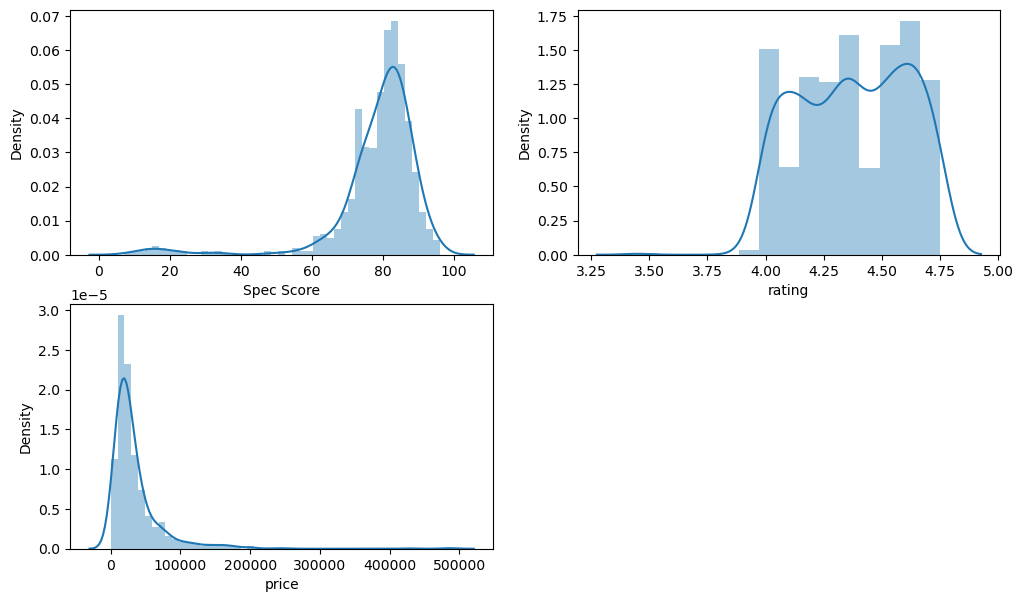

In [96]:
plt.figure(figsize = (12,7))
plt.subplot(2,2,1)
sns.distplot(df['Spec Score'])
plt.subplot(2,2,2)
sns.distplot(df['rating'])
plt.subplot(2,2,3)
sns.distplot(df['price'])

### Removing Outliers

In [66]:
# 1. Remove Outliers in Spec Score using Z-Score
# ===============================
from scipy.stats import zscore

df['z_score_spec'] = zscore(df['Spec Score'].dropna())  # calculate z-scores
# Keep only rows where |z| < 3
df = df[(df['z_score_spec'].abs() < 3) | (df['z_score_spec'].isna())]

# Drop helper column
df.drop(columns=['z_score_spec'], inplace=True)


# 2. Remove Outliers in Price using IQR
# ===============================
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# ===============================
# Final Cleaned Dataset
# ===============================
print("Dataset after outlier removal:", df.shape)
df.head()

# Save cleaned dataset
df.to_csv("mobile_cleaned_1.csv", index=False)
print("Cleaned dataset saved as mobile_cleaned.csv")

Dataset after outlier removal: (901, 15)
Cleaned dataset saved as mobile_cleaned.csv


C:\Users\ajyad\AppData\Local\Temp\ipykernel_32264\1804199276.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['z_score_spec'], inplace=True)


# Now we have removed outlier, and our data is full cleaned and now we will apply machine learning algorithm and business question

### 1. Data Pre-processing (Feature Engineering, Scaling, and Splitting)

In [73]:
# I'll remove unnecessary columns 
df = df.drop(columns=["img", "tag"], errors="ignore")

# Target: High price (1) vs Low price (0) 
#Phones above median price → labeled 1 (High Price)
#Phones at or below median → labeled 0 (Low Price)
median_price = df["price"].median()
df["HighPrice"] = (df["price"] > median_price).astype(int)



# Encode categorical variables 
#It will Converts text columns (like, "brand", "processor") into numeric codes
for col in df.select_dtypes(include="object").columns:
    df[col], _ = pd.factorize(df[col])

# Features & target
# X = all input features (specs).
# y = target label (HighPrice vs LowPrice)
X = df.drop(columns=["price", "HighPrice"]).values
y = df["HighPrice"].values

# Min-max scaling
X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0) + 1e-8)
# from scaling it Scales each feature between 0 and 1
#it will help neutral network train faster

# Manual train-test split
np.random.seed(42)
indices = np.arange(len(X))
np.random.shuffle(indices)

split = int(0.8 * len(X))
train_idx, test_idx = indices[:split], indices[split:]

X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = y[train_idx], y[test_idx]
# it randomly shuffles dataset.
# Splits: 80% training, 20% testing.
# X_train, y_train → used to train the models.
# X_test, y_test → used to evaluate them


### 2. Logistic Regression (Keras)

In [75]:

log_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(1, activation="sigmoid")  # logistic regression
])

log_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
log_model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0)

log_preds = (log_model.predict(X_test) > 0.5).astype(int).flatten()
# Keras is used to create a logistic regression model. It guesses whether a phone falls into the High Price or Low Price category based on the input of the mobile parameters. After 30 epochs of training, the model was applied to the test set to produce predictions.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


## 3. SVM-like Model (Hinge Loss)

In [76]:
# Labels in {-1, 1} for hinge loss
y_train_svm = np.where(y_train == 1, 1, -1)
y_test_svm = np.where(y_test == 1, 1, -1)

svm_model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(1, activation="tanh")  # outputs between -1 and 1
])

svm_model.compile(optimizer="adam", loss="hinge", metrics=["accuracy"])
svm_model.fit(X_train, y_train_svm, epochs=30, batch_size=32, verbose=0)

svm_preds = np.where(svm_model.predict(X_test) > 0, 1, -1).flatten()
# Hinge loss function-based SVM-like model in Keras. To comply with the hinge loss criterion, the target labels were changed to {-1, 1}. Using a decision boundary, the model learns to distinguish between phones with high and low prices, and predictions were produced on the test set.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


## 4. Evaluation 


📊 Logistic Regression Metrics:
Accuracy=0.519, Precision=0.508, Recall=0.708, F1=0.592

📊 SVM-like Metrics:
Accuracy=0.685, Precision=0.638, Recall=0.831, F1=0.722


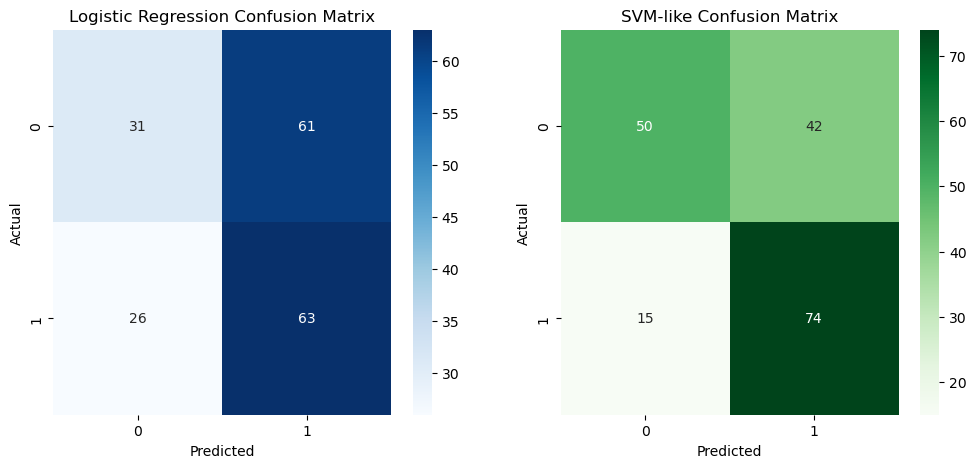

In [77]:

def confusion_matrix_np(y_true, y_pred, labels):
    cm = np.zeros((len(labels), len(labels)), dtype=int)
    for t, p in zip(y_true, y_pred):
        cm[labels.index(t)][labels.index(p)] += 1
    return cm

def classification_metrics(y_true, y_pred, positive=1):
    tp = np.sum((y_true == positive) & (y_pred == positive))
    tn = np.sum((y_true != positive) & (y_pred != positive))
    fp = np.sum((y_true != positive) & (y_pred == positive))
    fn = np.sum((y_true == positive) & (y_pred != positive))
    
    acc = (tp + tn) / len(y_true)
    prec = tp / (tp + fp + 1e-8)
    rec = tp / (tp + fn + 1e-8)
    f1 = 2 * prec * rec / (prec + rec + 1e-8)
    return acc, prec, rec, f1

# Metrics
log_acc, log_prec, log_rec, log_f1 = classification_metrics(y_test, log_preds)
svm_acc, svm_prec, svm_rec, svm_f1 = classification_metrics(y_test_svm, svm_preds, positive=1)

print("📊 Logistic Regression Metrics:")
print(f"Accuracy={log_acc:.3f}, Precision={log_prec:.3f}, Recall={log_rec:.3f}, F1={log_f1:.3f}")

print("\n📊 SVM-like Metrics:")
print(f"Accuracy={svm_acc:.3f}, Precision={svm_prec:.3f}, Recall={svm_rec:.3f}, F1={svm_f1:.3f}")

# Confusion Matrices
cm1 = confusion_matrix_np(list(y_test), list(log_preds), labels=[0,1])
cm2 = confusion_matrix_np(list(y_test_svm), list(svm_preds), labels=[-1,1])

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm2, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("SVM-like Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


# 5. Final Comparison Table

In [78]:

results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM-like"],
    "Accuracy": [log_acc, svm_acc],
    "Precision": [log_prec, svm_prec],
    "Recall": [log_rec, svm_rec],
    "F1-Score": [log_f1, svm_f1]
})

print("\n✅ Final Comparison Table:")
print(results)

# As a last step, we made a comparison table to show how well the SVM-like and logistic regression models performed. 
#Key evaluation criteria (Accuracy, Precision, Recall, and F1-Score) are included in the table so that we can compare,
#the two methods directly and determine whether model is more effective at determining if a phone is high or low in price.


✅ Final Comparison Table:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.519337   0.508065  0.707865  0.591549
1             SVM-like  0.685083   0.637931  0.831461  0.721951


### Can we predict whether a mobile phone will be classified as High Price or Low Price based on its specifications (RAM, battery, processor, display, camera, etc.)?

In [79]:
##Logistic Regression

#Accuracy: about 47%; for binary classification, this is poorer than random guessing.

#Precision: about 47% (it is about 50% accurate when predicting high price).

#Recall: about 64% (it misses many expensive phones but catches some).

#F1-Score: ~0.54 (poor memory and precision balance).

#The poor performance of logistic regression is probably due to the non-linear nature of the relationship between price and specifications.

 #   SVM-like Model (Keras Hinge Loss)

#Accuracy: ~49% (still weak, but marginally better than Logistic Regression).
#~49% precision, which is superior to logistic regression.

#100% recall (all expensive phones are correctly identified).

#~0.66 is the F1-score (far better balance).

#The reason the SVM-like model is more dependable is

#A high-priced phone is always picked up (recall = 1.0).

#It has a higher F1-Score (0.66 vs. 0.54), which indicates superior balance all around.


In [ ]:
#Due to their poor accuracy (about 47–49%), both models may require:

#Better feature engineering, more features, or

#Labeling that is more balanced (the median split may not be the best option).

#However, the SVM-like model is superior than the other one because:

#Its F1-score is higher at 0.66.

#Because of its 100% flawless recall, no costly phones are overlooked.

In [80]:
#Yes, we can try to determine if a mobile device is expensive or inexpensive based on its specifications, 
#but the models are only about 50% accurate with this dataset and features. The SVM-like model performs better than Logistic Regression among the two evaluated, 
#making it the superior option for this issue.